# MODELOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# pd.set_option ("display.max_rows", None)
# pd.set_option ("display.max_columns", None)
# pd.set_option ("display.max_colwidth",200)

from sklearn.metrics import accuracy_score

In [2]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game
#https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("./Data/paso_2_agrupaciones_con_building_id.csv", sep=',')

In [4]:
#df.head().T

In [5]:
df.shape

(818700, 36)

In [6]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [7]:
# df.head().T

In [8]:
df.shape

(818700, 35)

In [9]:
class_column = 'damage_grade'
classes_names = df['damage_grade'].unique()
print(class_column)
print(classes_names)

damage_grade
['Low-Medium' 'High-Severe']


In [10]:
df['damage_grade'].head(10)

0     Low-Medium
1    High-Severe
2     Low-Medium
3     Low-Medium
4     Low-Medium
5     Low-Medium
6    High-Severe
7     Low-Medium
8     Low-Medium
9     Low-Medium
Name: damage_grade, dtype: object

In [11]:
df=df.replace(['Low-Medium', 'High-Severe'], [0, 1])

In [12]:
# from sklearn.preprocessing import LabelEncoder
# le= LabelEncoder()

# df.damage_grade = le.fit_transform(df['damage_grade'])

In [13]:
df['damage_grade'].head(10)

0    0
1    1
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: damage_grade, dtype: int64

In [14]:
X= df.drop(["damage_grade"], axis=1)
y= df['damage_grade']

In [15]:
from sklearn.model_selection import train_test_split
X_cons, X_explo, y_cons, y_explo = train_test_split (X, y, test_size=0.2, random_state=0)

In [16]:
X_cons.shape,y_cons.shape,X_explo.shape,y_explo.shape

((654960, 34), (654960,), (163740, 34), (163740,))

In [17]:
IDs_cons = X_cons[['building_id']].copy()
IDs_explo=X_explo[['building_id']].copy()
X_cons=X_cons.drop(["building_id"],axis=1)
X_explo=X_explo.drop(["building_id"],axis=1)

### VARIABLES DUMMIES

In [18]:
X_explo =  pd.get_dummies(X_explo, drop_first= False) 
X_cons =  pd.get_dummies(X_cons, drop_first= False) 

In [19]:
X_explo.shape

(163740, 67)

In [20]:
# X = pd.get_dummies(X, drop_first= False) 

In [21]:
# from sklearn.model_selection import train_test_split
# X_cons, X_explo, y_cons, y_explo = train_test_split (X, y, test_size=0.2, random_state=0)

In [22]:
X_cons.shape, y_cons.shape,X_explo.shape, y_explo.shape

((654960, 67), (654960,), (163740, 67), (163740,))

In [23]:
X_cons.head()

,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,...,caste_household_no_familias,education_level_household_head_High,education_level_household_head_Illiterate,education_level_household_head_Low,education_level_household_head_Medium,education_level_household_head_no_familias,income_level_household_High,income_level_household_Low,income_level_household_Medium,income_level_household_no_familias
186608,220207,3,3.555348,6.447306,2.944439,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
365751,240604,1,1.791759,5.525453,2.079442,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
162357,210608,3,3.761200,5.645447,2.944439,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
573264,300204,2,3.496508,5.755742,2.639057,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
692933,310410,3,3.931826,7.188413,3.433987,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## ELIMINACIÓN DE VARIABLES

### COLINEADAS

In [24]:
X_cons=X_cons.drop(['caste_household_no_familias',  
'education_level_household_head_no_familias',  
'foundation_type_others',  'gender_household_head_Male',  
'gender_household_head_no_familias',  
'height_ft_pre_eq',  
'income_level_household_no_familias',
'land_surface_condition_No Flat',
'legal_ownership_status_Private',
'other_floor_type_Timber',
'plan_configuration_other',
'position_Not attached',
'roof_type_Bamboo/Timber-Light roof'
], axis=1)

In [25]:
X_cons.shape

(654960, 54)

In [26]:
X_explo=X_explo.drop(['caste_household_no_familias',  
'education_level_household_head_no_familias',  
'foundation_type_others',  'gender_household_head_Male',  
'gender_household_head_no_familias',  
'height_ft_pre_eq',  
'income_level_household_no_familias',
'land_surface_condition_No Flat',
'legal_ownership_status_Private',
'other_floor_type_Timber',
'plan_configuration_other',
'position_Not attached',
'roof_type_Bamboo/Timber-Light roof'
], axis=1)

### RFECV

In [27]:
# X_cons=X_cons.drop(["caste_household_Magar",
# "plan_configuration_Rectangular",
# "age_household_head",
# "roof_type_RCC/RB/RBC",
# "caste_household_Tamang",
# "has_superstructure_stone_flag",
# "education_level_household_head_Low",
# "other_floor_type_RCC/RB/RBC",
# "ground_floor_type_others",
# "legal_ownership_status_No Private",
# "has_superstructure_cement_mortar_stone",
# "position_Attached >1 side",
# "income_level_household_Low",
# "caste_household_Kami",
# "gender_household_head_Female",
# "ground_floor_type_RC",
# "land_surface_condition_Flat",
# "has_superstructure_cement_mortar_brick",
# "plan_configuration_L-shape",
# "caste_household_Rai",
# "caste_household_Damai/Dholi",
# "caste_household_Gurung",
# "caste_household_Sherpa",
# "count_families",
# "has_superstructure_rc_non_engineered",
# "has_superstructure_rc_engineered",
# "education_level_household_head_Illiterate",
# "has_superstructure_adobe_mud",
# "foundation_type_Mud mortar-Stone/Brick",
# "has_superstructure_mud_mortar_brick",
# "has_superstructure_other",
# "education_level_household_head_Medium",
# "caste_household_Other",
# "income_level_household_High",
# "roof_type_Bamboo/Timber-Heavy roof",
# "], axis=1)

In [28]:
# X_cons.shape

In [29]:
# X_explo=X_explo.drop(["caste_household_Magar",
# "plan_configuration_Rectangular",
# "age_household_head",
# "roof_type_RCC/RB/RBC",
# "caste_household_Tamang",
# "has_superstructure_stone_flag",
# "education_level_household_head_Low",
# "other_floor_type_RCC/RB/RBC",
# "ground_floor_type_others",
# "legal_ownership_status_No Private",
# "has_superstructure_cement_mortar_stone",
# "position_Attached >1 side",
# "income_level_household_Low",
# "caste_household_Kami",
# "gender_household_head_Female",
# "ground_floor_type_RC",
# "land_surface_condition_Flat",
# "has_superstructure_cement_mortar_brick",
# "plan_configuration_L-shape",
# "caste_household_Rai",
# "caste_household_Damai/Dholi",
# "caste_household_Gurung",
# "caste_household_Sherpa",
# "count_families",
# "has_superstructure_rc_non_engineered",
# "has_superstructure_rc_engineered",
# "education_level_household_head_Illiterate",
# "has_superstructure_adobe_mud",
# "foundation_type_Mud mortar-Stone/Brick",
# "has_superstructure_mud_mortar_brick",
# "has_superstructure_other",
# "education_level_household_head_Medium",
# "caste_household_Other",
# "income_level_household_High",
# "roof_type_Bamboo/Timber-Heavy roof"], axis=1)

In [31]:
X_cons.shape,y_cons.shape,X_explo.shape,y_explo.shape

((654960, 54), (654960,), (163740, 54), (163740,))

### TRAINING Y TEST

Hacemos el train y el test para el dataset de construcción

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_cons, y_cons, test_size=0.3, random_state=0)

In [32]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((458472, 54), (458472,), (196488, 54), (196488,))

### ESTANDARIZACIÓN DE LOS DATOS

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(X_train)
X_te_sc = scaler.transform(X_test)

### MUESTREO PARA ALGORITMOS MÁS PESADOS

In [34]:
#df.sample(frac=0.5).shape # (122, 7)
X_train_grid=X_train.sample(frac=0.2)
y_train_grid=y_train.sample(frac=0.2)
X_test_grid=X_test.sample(frac=0.2)
y_test_grid=y_test.sample(frac=0.2)

### NºTest1- CLASIFICADOR DUMMY, BASELINE

In [35]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train,y_train)

print("Scoring training:", clf_dummy.score(X_train, y_train))
print("Scoring test    :", clf_dummy.score(X_test, y_test))

Scoring training: 0.6048548221047305
Scoring test    : 0.6043269818004153


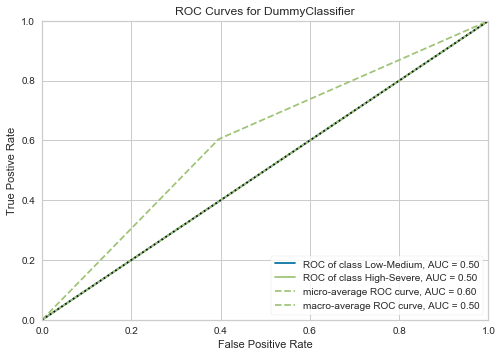

In [36]:
visualizer = ROCAUC(clf_dummy, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [37]:
from sklearn.metrics import classification_report

y_pred=clf_dummy.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     77745
           1       0.60      1.00      0.75    118743

    accuracy                           0.60    196488
   macro avg       0.30      0.50      0.38    196488
weighted avg       0.37      0.60      0.46    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                      0                  77745
True High-Severe                     0                 118743


### NºTest2- REGRESIÓN LOGÍSTICA

In [38]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver='lbfgs', C=10)
clf_lr.fit(X_tr_sc, y_train)

print("Scoring training:", clf_lr.score(X_tr_sc, y_train))
print("Scoring test    :", clf_lr.score(X_te_sc, y_test))

Scoring training: 0.7409111134376799
Scoring test    : 0.742910508529783


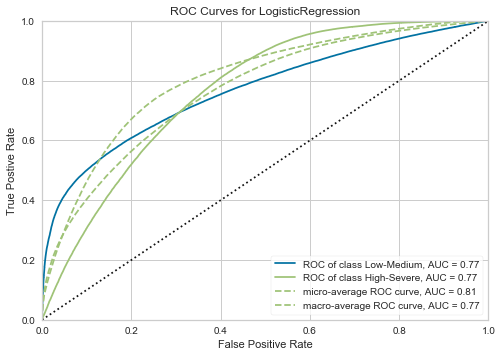

In [39]:
visualizer = ROCAUC(clf_lr, classes=classes_names)
                                    
visualizer.fit(X_tr_sc, y_train)        # Fit the training data to the visualizer
visualizer.score(X_te_sc, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [40]:
from sklearn.metrics import classification_report

y_pred=clf_lr.predict(X_te_sc)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.80      0.47      0.59     77745
           1       0.73      0.92      0.81    118743

    accuracy                           0.74    196488
   macro avg       0.76      0.70      0.70    196488
weighted avg       0.75      0.74      0.72    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  36383                  41362
True High-Severe                  9153                 109590


## NºTest3-  NAIVE BAYES

In [41]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train, y_train)
print("Scoring training:", nb.score(X_train, y_train))
print("Scoring test    :", nb.score(X_test, y_test))

Scoring training: 0.6347170601476207
Scoring test    : 0.6340132730752005


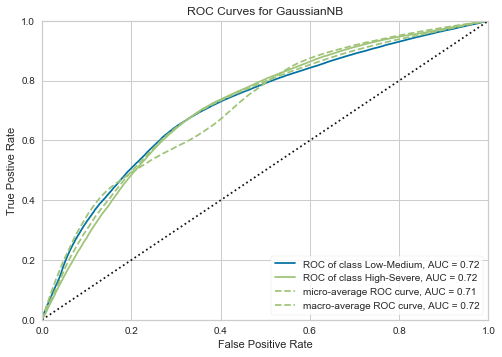

In [42]:
visualizer = ROCAUC(nb, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [43]:
from sklearn.metrics import classification_report

y_pred=nb.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.70      0.13      0.22     77745
           1       0.63      0.96      0.76    118743

    accuracy                           0.63    196488
   macro avg       0.67      0.55      0.49    196488
weighted avg       0.66      0.63      0.55    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  10052                  67693
True High-Severe                  4219                 114524


## KNN CLASSIFIER

### NºTest4- KNN 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Scoring training:", knn.score(X_train, y_train))
print("Scoring test    :", knn.score(X_test, y_test))

Scoring training: 0.8784440489277426
Scoring test    : 0.7817627539595293


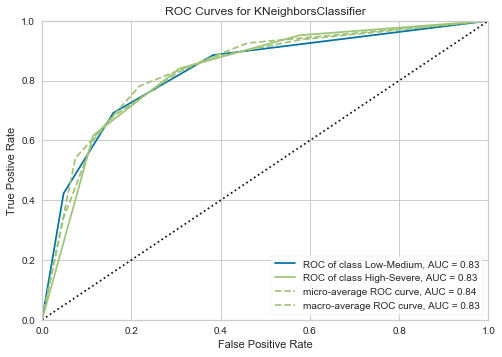

In [45]:
visualizer = ROCAUC(knn, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [46]:
from sklearn.metrics import classification_report

y_pred=knn.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.74      0.69      0.72     77745
           1       0.81      0.84      0.82    118743

    accuracy                           0.78    196488
   macro avg       0.77      0.77      0.77    196488
weighted avg       0.78      0.78      0.78    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  53802                  23943
True High-Severe                 18938                  99805


### NºTest5- KNN2

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Scoring training:", knn.score(X_train, y_train))
print("Scoring test    :", knn.score(X_test, y_test))

Scoring training: 0.8516637875377341
Scoring test    : 0.7891779650665689


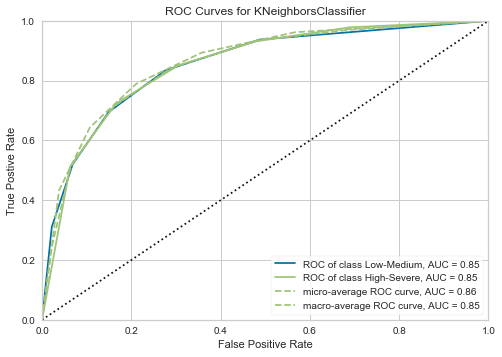

In [48]:
visualizer = ROCAUC(knn, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [49]:
from sklearn.metrics import classification_report

y_pred=knn.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     77745
           1       0.81      0.85      0.83    118743

    accuracy                           0.79    196488
   macro avg       0.78      0.77      0.78    196488
weighted avg       0.79      0.79      0.79    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  54006                  23739
True High-Severe                 17685                 101058


## DECISION TREE CLASSIFIER

### NºTest6- DECISION TREE CLASSIFIER 1

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)

print("Scoring training:", tree.score(X_train, y_train))
print("Scoring test    :", tree.score(X_test, y_test))

Scoring training: 0.9997426233226893
Scoring test    : 0.7681792272301616


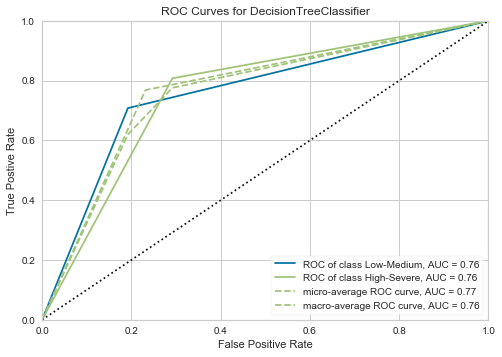

In [51]:
visualizer = ROCAUC(tree, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [52]:
from sklearn.metrics import classification_report

y_pred=tree.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     77745
           1       0.81      0.81      0.81    118743

    accuracy                           0.77    196488
   macro avg       0.76      0.76      0.76    196488
weighted avg       0.77      0.77      0.77    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  55042                  22703
True High-Severe                 22847                  95896


### NºTest7- DECISION TREE CLASSIFIER 2 

In [53]:
tree2=DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, max_depth=3)
tree2.fit(X_train, y_train)
print("Scoring training:", tree2.score(X_train, y_train))
print("Scoring test    :", tree2.score(X_test, y_test))

Scoring training: 0.7425884241567642
Scoring test    : 0.7439945441960832


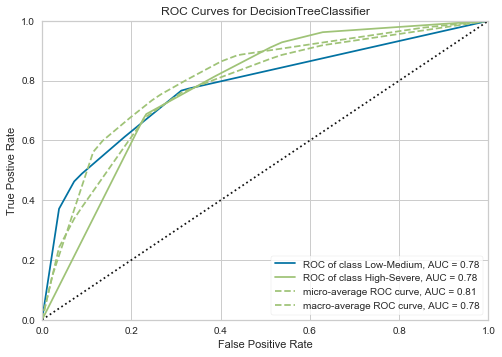

In [54]:
visualizer = ROCAUC(tree2, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [55]:
from sklearn.metrics import classification_report

y_pred=tree2.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.81      0.46      0.59     77745
           1       0.73      0.93      0.81    118743

    accuracy                           0.74    196488
   macro avg       0.77      0.70      0.70    196488
weighted avg       0.76      0.74      0.72    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  35985                  41760
True High-Severe                  8542                 110201


## RANDOM FOREST CLASSIFIER

### NºTest8- RANDOM FOREST CLASSIFIER 1

In [56]:
from sklearn.ensemble import RandomForestClassifier
modelRF1 = RandomForestClassifier(n_estimators=100, random_state=0, max_features=None, n_jobs=-1,
                             max_depth=15)
modelRF1.fit(X_train, y_train)
print("Scoring training:", modelRF1.score(X_train, y_train))
print("Scoring test    :", modelRF1.score(X_test, y_test))

Scoring training: 0.8617734561761677
Scoring test    : 0.8208185741622898


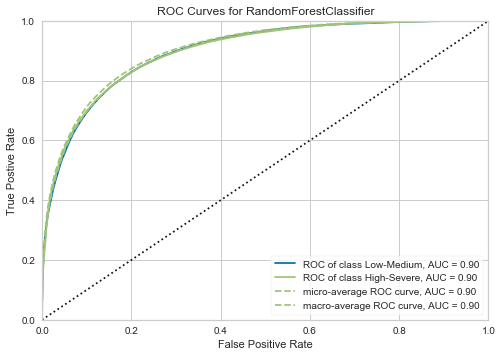

In [57]:
visualizer = ROCAUC(modelRF1, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [58]:
from sklearn.metrics import classification_report

y_pred=modelRF1.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.79      0.74      0.77     77745
           1       0.84      0.87      0.85    118743

    accuracy                           0.82    196488
   macro avg       0.81      0.81      0.81    196488
weighted avg       0.82      0.82      0.82    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  57733                  20012
True High-Severe                 15195                 103548


### NºTest9- RANDOM FOREST CLASSIFIER 2

In [59]:
from sklearn.ensemble import RandomForestClassifier
modelRF2 = RandomForestClassifier(n_estimators=200, random_state=0, min_samples_split=2,min_samples_leaf=2,
                                 max_features=None, n_jobs=-1)
modelRF2.fit(X_train, y_train)
print("Scoring training:", modelRF2.score(X_train, y_train))
print("Scoring test    :", modelRF2.score(X_test, y_test))

Scoring training: 0.9838070809122477
Scoring test    : 0.8239230894507552


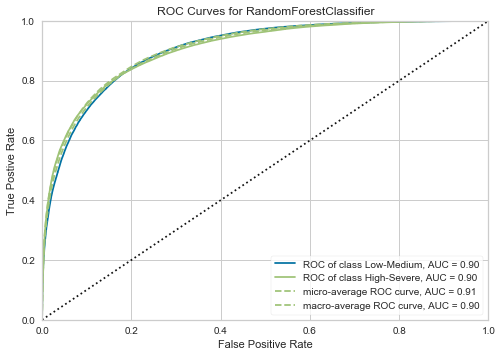

In [60]:
visualizer = ROCAUC(modelRF2, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [61]:
from sklearn.metrics import classification_report

y_pred=modelRF2.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77     77745
           1       0.85      0.86      0.86    118743

    accuracy                           0.82    196488
   macro avg       0.82      0.81      0.81    196488
weighted avg       0.82      0.82      0.82    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  59305                  18440
True High-Severe                 16156                 102587


### NºTest10- RANDOM FORSTE CLASSIFIER 3

In [62]:
from sklearn.ensemble import RandomForestClassifier
modelRF3 = RandomForestClassifier(n_estimators=300, random_state=0, min_samples_split=4,min_samples_leaf=2,
                                 max_features=None, n_jobs=-1)
modelRF3.fit(X_train, y_train)
print("Scoring training:", modelRF2.score(X_train, y_train))
print("Scoring test    :", modelRF2.score(X_test, y_test))

Scoring training: 0.9838070809122477
Scoring test    : 0.8239281788200806


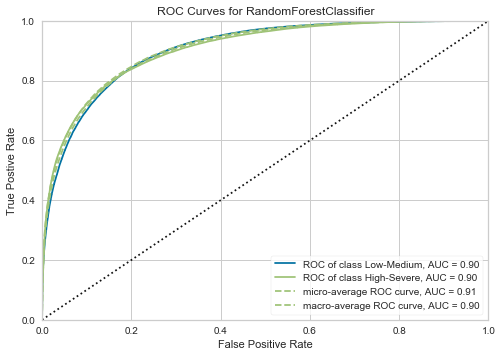

In [63]:
visualizer = ROCAUC(modelRF3, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [64]:
from sklearn.metrics import classification_report

y_pred=modelRF3.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77     77745
           1       0.85      0.86      0.86    118743

    accuracy                           0.82    196488
   macro avg       0.82      0.81      0.82    196488
weighted avg       0.82      0.82      0.82    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  59342                  18403
True High-Severe                 16087                 102656


### NºTest12-  RANDOM FORSTE CLASSIFIER 4

In [65]:
from sklearn.ensemble import RandomForestClassifier
modelRF4 = RandomForestClassifier(n_estimators=500, random_state=0, min_samples_split=4,min_samples_leaf=2,
                                 max_features=None, n_jobs=-1)
modelRF4.fit(X_train, y_train)
print("Scoring training:", modelRF4.score(X_train, y_train))
print("Scoring test    :", modelRF4.score(X_test, y_test))

Scoring training: 0.9842084140361897
Scoring test    : 0.8247781034974146


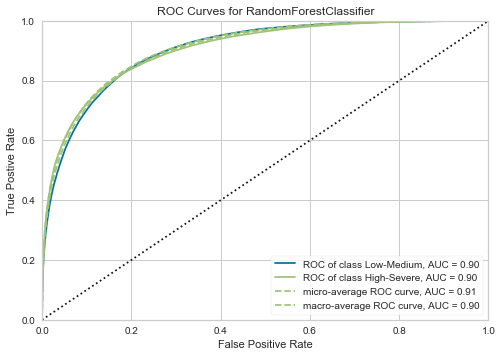

In [66]:
visualizer = ROCAUC(modelRF4, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [67]:
from sklearn.metrics import classification_report

y_pred=modelRF4.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     77745
           1       0.85      0.87      0.86    118743

    accuracy                           0.82    196488
   macro avg       0.82      0.81      0.82    196488
weighted avg       0.82      0.82      0.82    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  59338                  18407
True High-Severe                 16022                 102721


### NºTest11- RANDOM FOREST CLASSIFIER 5

In [68]:
from sklearn.ensemble import RandomForestClassifier
modelRF5 = RandomForestClassifier(n_estimators=200, random_state=0, min_samples_split=4,min_samples_leaf=2,
                                 max_features=None, n_jobs=-1)
modelRF5.fit(X_train, y_train)
print("Scoring training:", modelRF5.score(X_train, y_train))
print("Scoring test    :", modelRF5.score(X_test, y_test))

Scoring training: 0.9838070809122477
Scoring test    : 0.8239281788200806


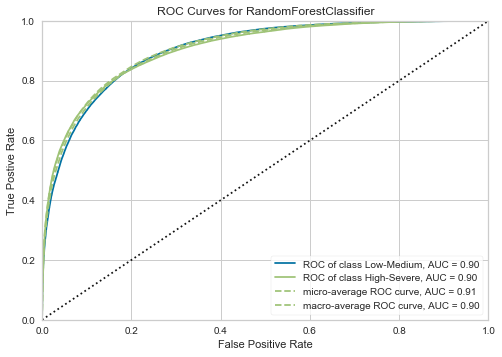

In [69]:
visualizer = ROCAUC(modelRF5, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [70]:
from sklearn.metrics import classification_report

y_pred=modelRF5.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77     77745
           1       0.85      0.86      0.86    118743

    accuracy                           0.82    196488
   macro avg       0.82      0.81      0.81    196488
weighted avg       0.82      0.82      0.82    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  59305                  18440
True High-Severe                 16156                 102587


### RANDOM FOREST CLASSIFIER 6

In [71]:
# from sklearn.ensemble import RandomForestClassifier
# modelRF6 = RandomForestClassifier(n_estimators=500, random_state=0, max_features=None, n_jobs=-1,
#                              max_depth=15)
# modelRF6.fit(X_train, y_train)
# print("Scoring training:", modelRF6.score(X_train, y_train))
# print("Scoring test    :", modelRF6.score(X_test, y_test))

In [72]:
# visualizer = ROCAUC(modelRF6, classes=classes_names)
                                    
# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show()

In [73]:
# from sklearn.metrics import classification_report

# y_pred=modelRF6.predict(X_test)

# print(classification_report(y_test, y_pred))

# conf=pd.DataFrame(
#     confusion_matrix(y_test, y_pred),
#     columns=['Predicted Low-Medium', 'Predicted High-Severe'],
#     index  =['True Low-Medium', 'True High-Severe']
# )
# print(conf)

### RANDOM FOREST GRID SEARCH CV

In [63]:
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix

def doGridSearch(model, grid, scores, X_train, y_train, X_test, y_test, columns, indices):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
#en el cv se puede pasar también un objeto de tipo cv
#el 10 es un valor estándar que tienes un compromiso bastante justo
#scoring le dices que métrica escoges
#Si quisiera hacerlo random
#randomizedSearchCV en del grid para que sea aleatorio en lugar de la rejilla
        clf=GridSearchCV(model, grid, cv=10, scoring='%s' % score)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()

        means=clf.cv_results_['mean_test_score']
        stds =clf.cv_results_['std_test_score']

        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()

        conf=pd.DataFrame(
            confusion_matrix(y_test, y_pred),
            columns=columns,
            index  =indices
        )
        print(conf)
        
        return clf.best_estimator_
    #devuelve el mejor modelo de los que ha probado

In [66]:
tuned_parameters={'n_estimators': [201, 401, 601, 801, 1001],
                  'max_features': ['auto'],
                  'max_depth'   : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [67]:
doGridSearch(RandomForestClassifier(), tuned_parameters, ['accuracy'], X_train_grid, y_train_grid, X_test_grid, y_test_grid, ['1', '0'], ['True 1', 'True 0'])

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 1001}

Grid scores on development set:

0.605 (+/-0.000) for {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 201}
0.605 (+/-0.000) for {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 401}
0.605 (+/-0.000) for {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 601}
0.605 (+/-0.000) for {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 801}
0.605 (+/-0.000) for {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 1001}
0.603 (+/-0.001) for {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 201}
0.603 (+/-0.002) for {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 401}
0.604 (+/-0.002) for {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 601}
0.604 (+/-0.002) for {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 801}
0.604 (+/-0.002) for {'max_depth': 20, 'max_features': 'au

RandomForestClassifier(max_depth=10, n_estimators=1001)

## NºTest13- ADABOOST

In [74]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab.fit(X_train, y_train)
print("Scoring training:", ab.score(X_train, y_train))
print("Scoring test    :", ab.score(X_test, y_test))

Scoring training: 0.7702847720253363
Scoring test    : 0.772016611701478


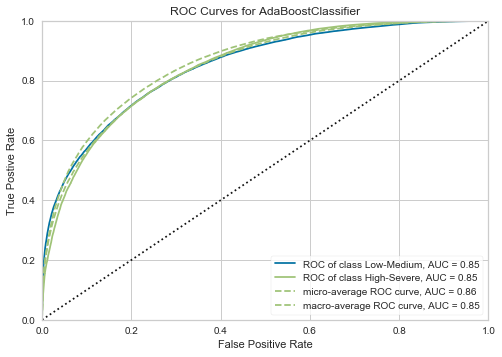

In [75]:
visualizer = ROCAUC(ab, classes=classes_names)
                                    
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [76]:
from sklearn.metrics import classification_report

y_pred=ab.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.77      0.61      0.68     77745
           1       0.77      0.88      0.82    118743

    accuracy                           0.77    196488
   macro avg       0.77      0.74      0.75    196488
weighted avg       0.77      0.77      0.77    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  47354                  30391
True High-Severe                 14405                 104338


## GRADIENT BOOSTING 

### NºTest14- GRADIENT BOOSTING 1

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb1 = GradientBoostingClassifier(n_estimators=5)
clf_gb1.fit(X_tr_sc, y_train)
print("Scoring training:", clf_gb1.score(X_tr_sc, y_train))
print("Scoring test    :", clf_gb1.score(X_te_sc, y_test))

Scoring training: 0.7405272295799962
Scoring test    : 0.7417450429542771


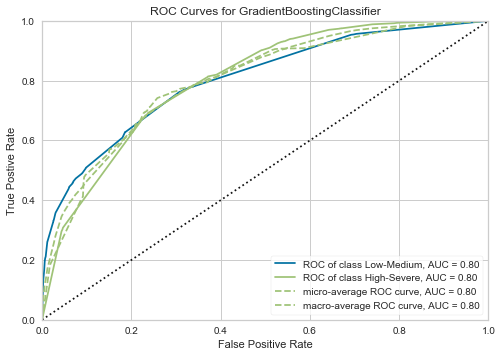

In [78]:
visualizer = ROCAUC(clf_gb1, classes=classes_names)
                                    
visualizer.fit(X_tr_sc, y_train)        # Fit the training data to the visualizer
visualizer.score(X_te_sc, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [79]:
from sklearn.metrics import classification_report

y_pred=clf_gb1.predict(X_te_sc)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.83      0.44      0.57     77745
           1       0.72      0.94      0.81    118743

    accuracy                           0.74    196488
   macro avg       0.77      0.69      0.69    196488
weighted avg       0.76      0.74      0.72    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  34055                  43690
True High-Severe                  7054                 111689


### NºTest15- GRADIENT BOOSTING 2

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,max_features=0.8, min_samples_split=4)
clf_gb2.fit(X_tr_sc, y_train)
print("Scoring training:", clf_gb2.score(X_tr_sc, y_train))
print("Scoring test    :", clf_gb2.score(X_te_sc, y_test))

Scoring training: 0.7527395348025615
Scoring test    : 0.7543361426652009


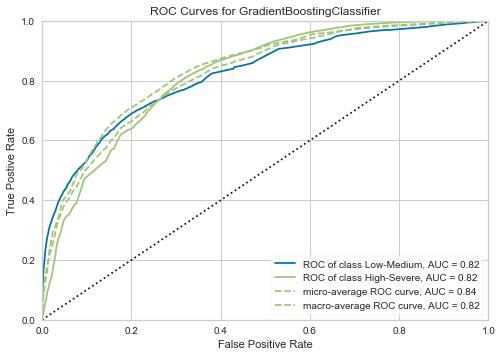

In [81]:
visualizer = ROCAUC(clf_gb2, classes=classes_names)
                                    
visualizer.fit(X_tr_sc, y_train)        # Fit the training data to the visualizer
visualizer.score(X_te_sc, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [82]:
from sklearn.metrics import classification_report

y_pred=clf_gb2.predict(X_te_sc)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.80      0.50      0.62     77745
           1       0.74      0.92      0.82    118743

    accuracy                           0.75    196488
   macro avg       0.77      0.71      0.72    196488
weighted avg       0.76      0.75      0.74    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  39049                  38696
True High-Severe                  9574                 109169


### NºTest16- GRADIENT BOOSTING 3

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb3 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=500,max_features=0.8, min_samples_split=4)
clf_gb3.fit(X_tr_sc, y_train)
print("Scoring training:", clf_gb3.score(X_tr_sc, y_train))
print("Scoring test    :", clf_gb3.score(X_te_sc, y_test))

Scoring training: 0.7753995881973162
Scoring test    : 0.7765003460771142


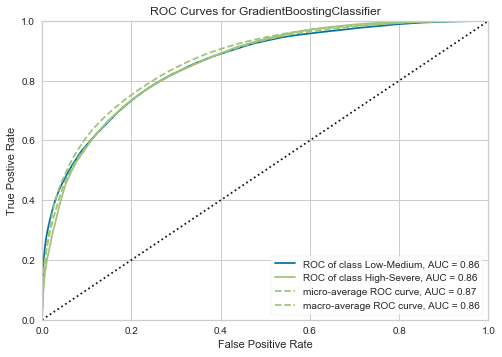

In [84]:
visualizer = ROCAUC(clf_gb3, classes=classes_names)
                                    
visualizer.fit(X_tr_sc, y_train)        # Fit the training data to the visualizer
visualizer.score(X_te_sc, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [85]:
from sklearn.metrics import classification_report

y_pred=clf_gb3.predict(X_te_sc)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.77      0.61      0.69     77745
           1       0.78      0.88      0.83    118743

    accuracy                           0.78    196488
   macro avg       0.78      0.75      0.76    196488
weighted avg       0.78      0.78      0.77    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  47762                  29983
True High-Severe                 13932                 104811


## NºTest17- XGBOOST

In [86]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(X_tr_sc, y_train)
print("Scoring training:", modelXGB.score(X_tr_sc, y_train))
print("Scoring test    :", modelXGB.score(X_te_sc, y_test))

Scoring training: 0.773499799333438
Scoring test    : 0.7748463010463743


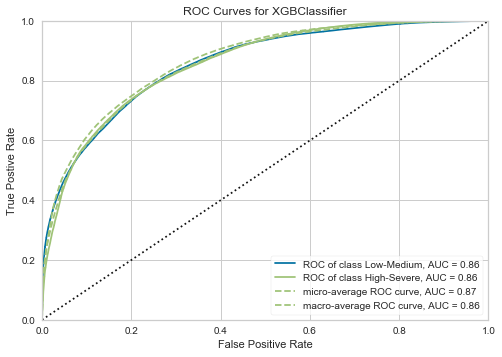

In [87]:
visualizer = ROCAUC(modelXGB, classes=classes_names)
                                    
visualizer.fit(X_tr_sc, y_train)        # Fit the training data to the visualizer
visualizer.score(X_te_sc, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [88]:
from sklearn.metrics import classification_report

y_pred=modelXGB.predict(X_te_sc)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.77      0.62      0.68     77745
           1       0.78      0.88      0.83    118743

    accuracy                           0.77    196488
   macro avg       0.77      0.75      0.75    196488
weighted avg       0.77      0.77      0.77    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  47922                  29823
True High-Severe                 14417                 104326


### XGBOOST: Hyperparameters-tunning
https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning

In [89]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb

In [90]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [91]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [92]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
0.6717662147306706                                                                                                     
SCORE:                                                                                                                 
0.6619437319327389                                                                                                     
SCORE:                                                                                                                 
0.665908350637189                                                                                                      
SCORE:                                                                                                                 
0.6730232889540329                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.673155612556492                                                                                                      
SCORE:                                                                                                                 
0.6259975163877692                                                                                                     
SCORE:                                                                                                                 
0.6266387769227637                                                                                                     
SCORE:                                                                                                                 
0.6741073246203331                                                                                                     
SCORE:                                  

In [93]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7771636084915482, 'gamma': 6.583804065504037, 'max_depth': 11.0, 'min_child_weight': 4.0, 'reg_alpha': 69.0, 'reg_lambda': 0.2942349631872772}


In [94]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier(colsample_bytree=  0.7771636084915482, gamma=  6.583804065504037, max_depth= 11, 
                         min_child_weight= 4.0, reg_alpha= 69.0, reg_lambda= 0.2942349631872772)
modelXGB.fit(X_tr_sc, y_train)
print("Scoring training:", modelXGB.score(X_tr_sc, y_train))
print("Scoring test    :", modelXGB.score(X_te_sc, y_test))

Scoring training: 0.8086011795703991
Scoring test    : 0.806166279874598


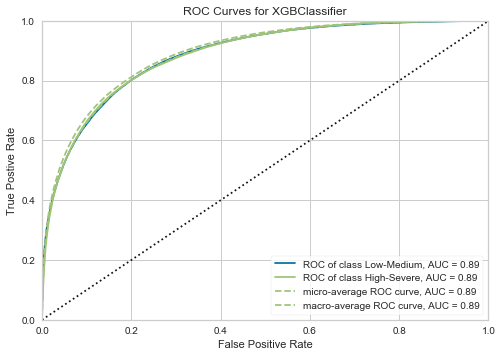

In [95]:
visualizer = ROCAUC(modelXGB, classes=classes_names)
                                    
visualizer.fit(X_tr_sc, y_train)        # Fit the training data to the visualizer
visualizer.score(X_te_sc, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [96]:
from sklearn.metrics import classification_report

y_pred=modelXGB.predict(X_te_sc)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Low-Medium', 'Predicted High-Severe'],
    index  =['True Low-Medium', 'True High-Severe']
)
print(conf)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74     77745
           1       0.82      0.87      0.84    118743

    accuracy                           0.81    196488
   macro avg       0.80      0.79      0.79    196488
weighted avg       0.80      0.81      0.80    196488

                  Predicted Low-Medium  Predicted High-Severe
True Low-Medium                  54796                  22949
True High-Severe                 15137                 103606
